<a href="https://colab.research.google.com/github/Seungwon-hub/ESAA/blob/main/ESAA_YB_Week13_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5. DBSCAN

### DBSCAN 개요

- DBSCAN: 밀도 기반 군집화의 대표적 알고리즘
- 데이터 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화 가능
- 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화 잘 수행

<가장 중요한 파라미터>
- 입실론 주변 영역: 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- 최소 데이터 개수: 개별 데이터 입실론 주변 영역에 포함되는 타 데이터의 개수



### DBSCAN 적용하기 - 붓꽃 데이터 세트

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset
iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=iris.feature_names)

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


- 군집 레이블이 -1인 것은 노이즈에 속하는 군집
- 위 붓꽃 데이터 세트는 DBSCAN에서 0과 1 두 개의 군집으로 군집화됨


<ipython-input-6-2659814855>:18: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=45,


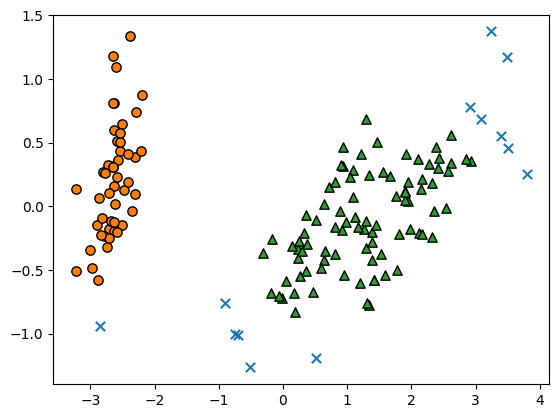

In [39]:
from sklearn.decomposition import PCA
import numpy as np

# 2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 반환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

# visualize_cluster_plot()함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- x로 표현된 값은 모두 노이즈
- DBSCAN을 적용할 때는 특정 군집 개수로 군집을 강제하지 않는 것이 좋음
- 적절한 eps, min_samples 파라미터를 통해 최적의 군집을 찾는 게 중요

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


<ipython-input-6-2659814855>:18: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=45,


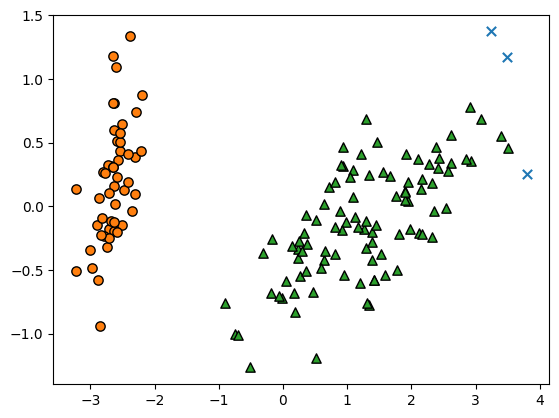

In [40]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

- 노이즈 군집인 -1이 3개밖에 없음

In [41]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')

### DBSCAN 적용하기 - make_circles() 데이터 세트

- make_circles()

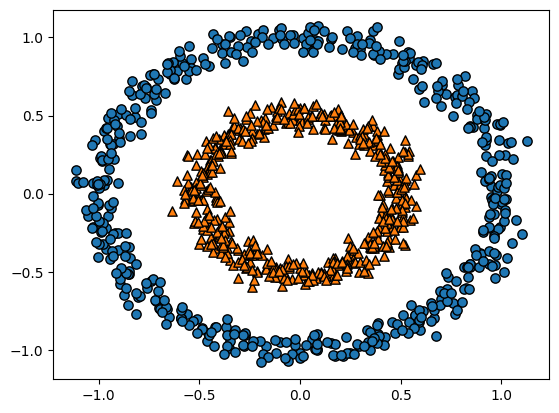

In [42]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

- 내부 원과 외부 원으로 구분되는 데이터 세트를 생성

K-Means와 GMM은 어떻게 데이터 세트 군집화하는지 확인

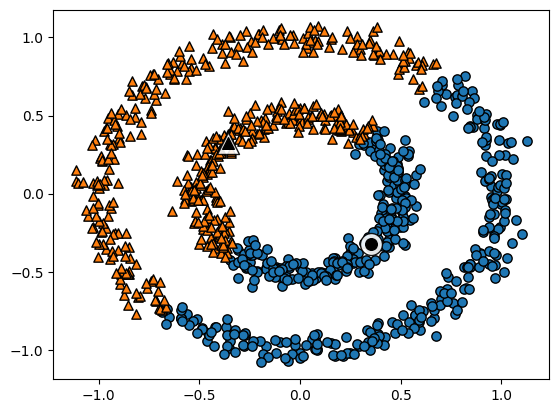

In [43]:
# KMeans로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

- 위, 아래 군집 중심을 기반으로 위와 아래 절반으로 군집화
- 거리 기반 군집화로는 데이터가 특정한 형태로 지속해서 이어지는 부분 찾기 어려움

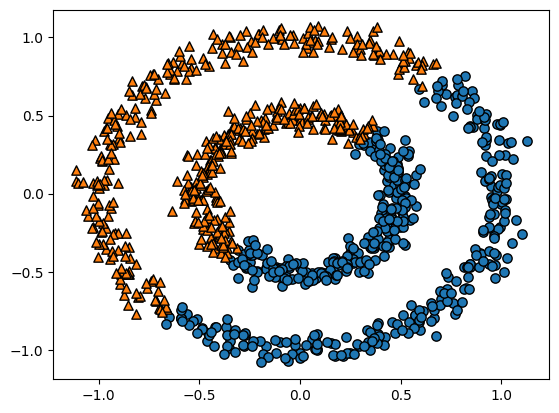

In [44]:
# GMM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

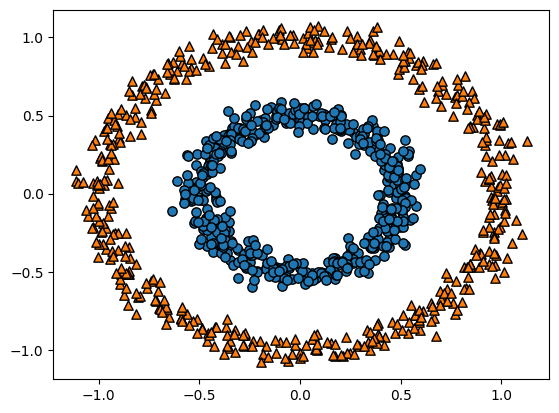

In [45]:
# DBSCAN으로 make_circles() 데이터 세트 군집화 수행
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

## 6. 군집화 실습 - 고객 세그먼테이션

- 고객 세그먼테이션: 다양한 기준으로 고객을 분류하는 기법. CRM이나 마케팅의 중요 기반 요소

<고객 분류 요소>
- 개인의 신상 데이터: 지역, 결혼 여부, 성별, 소득
- 어떤 상품을 얼마나 많은 비용을 써서 얼마나 자주 사용하는 가에 기반한 정보

### 데이터 세트 로딩과 데이터 클렌징

In [46]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

retail_df = pd.read_excel(io='Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


- InvoiceNo: 주문번호
- StockCode: 제품 코드
- Description: 제품 설명
- Quality: 주문 제품 건수
- InvoiceDate: 주문 일자
- UnitPrice: 제품단가
- CustomerID: 고객 번호
- Country: 국가명

In [47]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- Null 데이터 제거: CustomerID가 Null값인 데이터가 많음. 고객 세그먼테이션을 수행하므로 고객 식별 번호가 없는 데이터는 필요가 없기에 삭제
- 오류 데이터 삭제: 대표적인 오류 데이터는 Quantity or UnitPrice가 0보다 작은 경우

In [48]:
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [49]:
retail_df['Country'].value_counts()[:5]

,count
Country,
United Kingdom,354321
Germany,9040
France,8341
EIRE,7236
Spain,2484


In [50]:
retail_df = retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

(354321, 8)


### RFM 기반 데이터 가공

In [51]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

<ipython-input-51-1948582747>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
<ipython-input-51-1948582747>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)


In [52]:
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

CustomerID
17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: count, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [53]:
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count().mean()

np.float64(1.028702077315023)

In [54]:
# DataFrame의 groupby()의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 칼럼의 max()에서 데이터 가공
# Frequency는 IncvoiceNo칼럼의 count(), Monetary value는 sale_amount 칼럼의 sum()
aggregations = {
    'InvoiceDate' : 'max',
    'InvoiceNo' : 'count',
    'sale_amount' : 'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 칼럼 값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo': 'Frequency',
                                    'sale_amount': 'Monetary'})
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


In [55]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 칼럼 건수는', cust_df.shape)
cust_df.head(3)

cust_df 로우와 칼럼 건수는 (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


### RFM 기반 고객 세그먼테이션

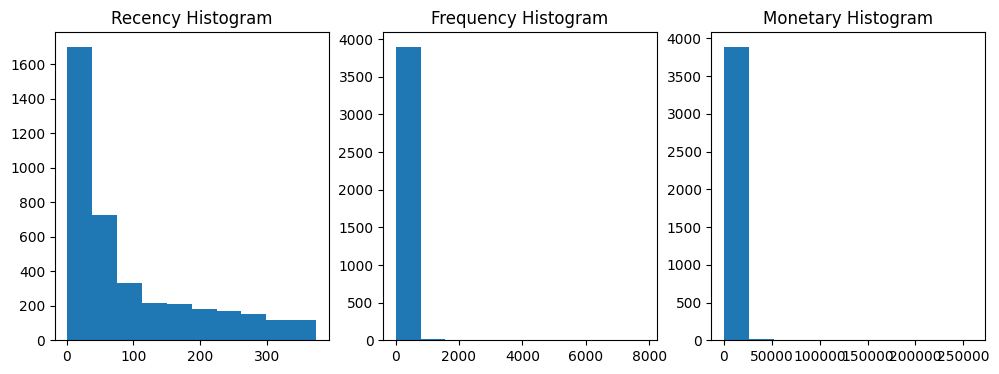

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])
plt.show()

In [57]:
cust_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는: {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는: 0.576


In [59]:
import numpy as np
import matplotlib.cm as cm

def visualize_silhouette(cluster_lists, X_features):
    # Input으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 갯수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 반복문으로 클러스터링 갯수별 KMeans 수행 후 실루엣 계수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 각 데이터별 실루엣 값 계산
        kmeans = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0)
        kmeans_labels = kmeans.fit_predict(X_features)

        silhouette_avg = silhouette_score(X_features, kmeans_labels)
        silhouette_values = silhouette_samples(X_features, kmeans_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(silhouette_avg,3)))
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the y-axis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( ) 형태의 막대 그래프 표현
        for i in range(n_cluster):
            curr_silhouette_vals = silhouette_values[kmeans_labels == i]
            curr_silhouette_vals.sort()

            size_cluster_i = curr_silhouette_vals.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, curr_silhouette_vals, \
                                facecolor=color, edgecolor='k')

            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

    plt.show()

def visualize_kmeans_plot_multi(cluster_lists, X_features):
    # plt.subplots()으로 리스트에 기재된 클러스터링 갯수만큼의 sub figures를 가지는 axs 생성
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 입력 데이터로 feature데이터와 클러스터링 갯수를 입력하면 클러스터링 결과를 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장
        kmeans = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0)
        kmeans_labels = kmeans.fit_predict(X_features)
        dataframe = pd.DataFrame(X_features)
        dataframe['cluster'] = kmeans_labels

        # cluster 값이 0, 1, 2인 경우마다 별도의 Index로 추출
        unique_labels = np.unique(kmeans_labels)
        markers=['o', '^', 's', 'P', 'D', 'H', 'x']

        # 클러스터링 갯수별로 scatter plot으로 시각화
        for label in unique_labels:
            label_cluster = dataframe[dataframe['cluster']==label]
            axs[ind].scatter(x=label_cluster[0], y=label_cluster[1], edgecolor='k',
                            marker=markers[label], s=45)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))
        axs[ind].set_xlabel('Feature 1')
        axs[ind].set_ylabel('Feature 2')

    plt.show()

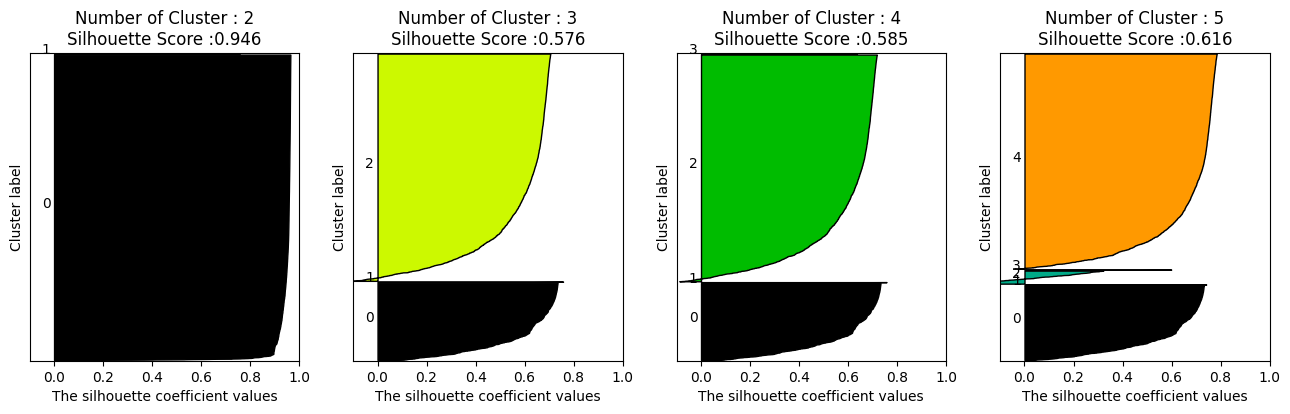

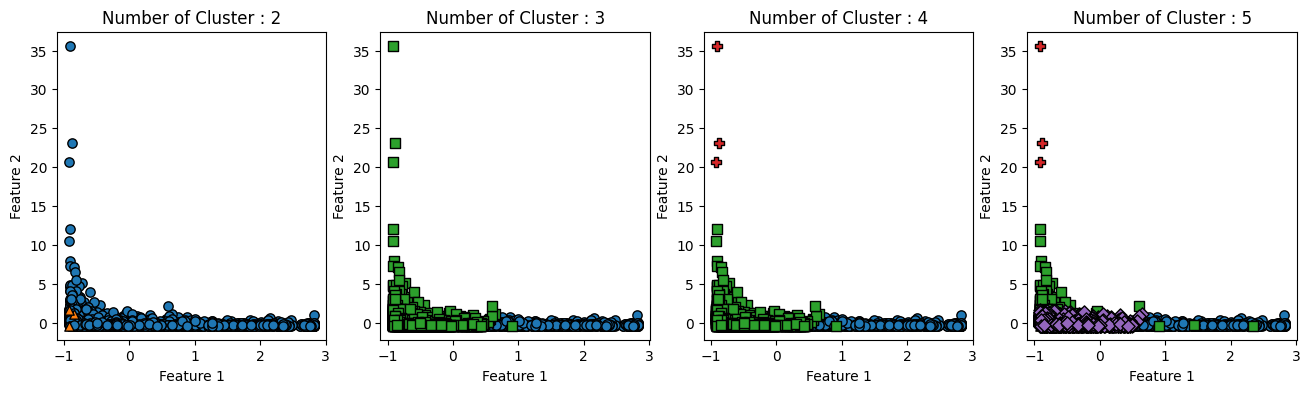

In [60]:
visualize_silhouette([2,3,4,5], X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5], X_features_scaled)

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequency, Monetary 칼럼에 np.log1p()로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log', 'Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는: {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는: 0.303


## 7. 정리

평균 이동은 K-평균과 유사하지만 거리 중심이 아니라 데이터가 모여 있는 밀도가 가장 높은 쪽으로 군집 중심점을 이동하면서 군집하를 수행함. 컴퓨터 비전 영역에서 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는 데 뛰어남

GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 모델을 섞어서 생성된 모델로 가정해 수행하는 방식. 전체 데이터 세트에서 서로 다른 정규 분포 형태를 추출해 이렇게 다른 정규 분포를 가진 데이터 세트를 군집화하는 것.

DBSCAN은 밀도 기반 군집화의 대표적인 알고리즘. DBSCAN은 입실론 주변 영역 내에 포함되는 최소 데이터 개수의 충족 여부에 따라 데이터 포인트를 핵심 포인트, 이웃 포인트, 경계 포인트, 잡음 포인트로 구분하고 특정 핵심 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 구성하는 방식.